# Introduction to MDAnalysis

---

## Lesson 2: Basic Analysis in MDAnalysis
**Author**: Aaryesh Deshpande

**Email**: adeshpande334@gatech.edu
In this lesson, we will explore various analysis modules available in MDAnalysis, a powerful library for the analysis of molecular dynamics (MD) simulations. MDAnalysis provides a wide range of tools to perform complex analyses on MD trajectories and structures. We will cover the following topics:

### Example analysis modules:
1. **Root-Mean-Square Deviation (RMSD)**: Calculate the RMSD to measure the structural similarity between different frames of a trajectory.
2. **Principal Component Analysis (PCA)**: Perform PCA to identify the major modes of motion in the simulation.
3. **Contact Analysis**: Analyze the contacts between different parts of the molecule to understand interactions.
4. **Distance Calculations**: Compute distances between atoms or groups of atoms to study structural properties.
5. **Alignment**: Align structures to a reference to remove rotational and translational motions.

By the end of this lesson, you will have a solid understanding of how to use MDAnalysis for various types of analyses, enabling you to gain deeper insights into your molecular dynamics simulations.

#### Workflow

1. **Data Access and Storage**: We will fetch the necessary data files from a specified URL and store them in a directory named `data`.
2. **Environment Setup**: Import the necessary libraries and set up the environment for data analysis and visualization.
3. **Loading Data**: Use MDAnalysis to load the topology and trajectory files into a Universe object.
4. **Basic Analysis**: Perform basic analyses such as calculating the root-mean-square deviation (RMSD) and visualizing the trajectory.

### Data Access and Storage

In this notebook, we access the data by fetching it from a specified URL. The data includes two essential files:
- **Topology file**: Contains the structural information of the molecules.
- **Trajectory file**: Contains the simulation data over time.

To organize our workflow, we first create a directory named `data` where we will store all our downloaded files. This ensures that our files are neatly organized and easily accessible for further analysis.

#### Replace the url with the url of the file you want to download

In [7]:
import os
from urllib.request import urlretrieve

# Create a directory named 'data' in the current working directory if it doesn't exist
data_dir = 'data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)

# URLs for downloading the topology and trajectory files
topology_url = "https://figshare.com/ndownloader/files/8672230"
trajectory_url = "https://figshare.com/ndownloader/files/8672074"

# Paths where the downloaded files will be saved
topology_file_path = os.path.join(data_dir, "adk4AKE_toplogy.psf")
trajectory_file_path = os.path.join(data_dir, "adk4AKE_traj.dcd")

# Download the topology file for the molecular dynamics simulation
urlretrieve(topology_url, topology_file_path)

# Download the trajectory file for the molecular dynamics simulation
urlretrieve(trajectory_url, trajectory_file_path)

print(f"Topology file downloaded to: {topology_file_path}")
print(f"Trajectory file downloaded to: {trajectory_file_path}")

Topology file downloaded to: data\adk4AKE_toplogy.psf
Trajectory file downloaded to: data\adk4AKE_traj.dcd


In [ ]:
#If these modules are not installed, please install them by running this cell
!python3 -m pip install matplotlib seaborn pandas numpy mdanalysis MDAnalysisTests nglview

In [77]:
# Enable interactive plotting with widgets
%matplotlib widget 

# Import necessary modules
import nglview as nv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Import the MDAnalysis library for molecular dynamics analysis
import MDAnalysis as mda
#Warning handler
mda.warnings.showwarning

# Import the MDAnalysis test data that is bundled with the library
from MDAnalysis.tests.datafiles import GRO, TRR, TPR, XTC, DCD, PSF, PDB_small

# Import specific analysis modules from MDAnalysis
from MDAnalysis.analysis import rms, align, contacts, rdf, pca, diffusionmap

# Import the helix_analysis module from MDAnalysis.analysis
from MDAnalysis.analysis import helix_analysis as hel

# Import the MDAnalysis library for molecular dynamics analysis
from MDAnalysis.lib import distances as mda_distances

# Import the HydrogenBondAnalysis module for hydrogen bond analysis
from MDAnalysis.analysis.hydrogenbonds import HydrogenBondAnalysis as HBA

# Enable inline plotting
%matplotlib inline

In [63]:
# Define the paths to the topology and trajectory files
topology_file_path = "./data/adk4AKE_toplogy.psf"
trajectory_file_path = "./data/adk4AKE_traj.dcd"

# Load the topology and trajectory files into the MDAnalysis Universe
universe = mda.Universe(topology_file_path, trajectory_file_path)

# Print the number of frames in the trajectory
num_frames = universe.trajectory.n_frames
print(f"Number of frames in the trajectory: {num_frames}")

# Print the time step between frames in picoseconds
time_step = universe.trajectory.dt
print(f"Time step between frames (ps): {time_step}")

# Print the total simulation time in picoseconds
total_time = universe.trajectory.totaltime
print(f"Total simulation time (ps): {total_time}")

# Print the current time step object
current_time_step = universe.trajectory.ts
print(f"Current time step object: {current_time_step}")

Number of frames in the trajectory: 4187
Time step between frames (ps): 240.00000489999024
Total simulation time (ps): 1004640.0205113592
Current time step object: < Timestep 0 with unit cell dimensions [85.53471 85.53471 85.53471 90.      90.      90.     ] >


C:\Users\aarye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\MDAnalysis\coordinates\DCD.py:165: DeprecationWarning: DCDReader currently makes independent timesteps by copying self.ts while other readers update self.ts inplace. This behavior will be changed in 3.0 to be the same as other readers. Read more at https://github.com/MDAnalysis/mdanalysis/issues/3889 to learn if this change in behavior might affect you.
  warnings.warn("DCDReader currently makes independent timesteps"


In [3]:
# Visualize the molecular trajectory using NGLView
view = nv.show_mdanalysis(universe)
view.add_representation("cartoon", selection="protein", color="residueindex")
view.camera = 'orthographic'
view.control.zoom(0.25)
# view._set_spin([0, 1, 0], 0.01) # Spin the view around the y-axis
view


NGLWidget(max_frame=4186)

### Navigating Through a Trajectory

So far, we have mainly focused on examining a single frame of the `trajectory` object. When a `Universe` is created, the *Timestep* is initialized with data from the first (zero-th) frame by default.

In this section, we will explore how to navigate through the trajectory and access data from various frames.

The `trajectory` object can be thought of as an iterator that retrieves trajectory data from a source (typically the input trajectory file) and supplies the relevant data to the *Timestep* object.

The following methods can be used to access the trajectory:
* Random access using trajectory indexing
* Iterating over all frames
* Slicing to iterate over a specific portion of the trajectory

<div class="alert alert-info"><b>Reminder</b>
 
As is standard in python, `trajectory` access is done via **0-based indices**. So the first frame is `0`, and the final frame is `n_frames - 1`. 
</div>

In [39]:
# Trajectory indexing
# It is possible to randomly access any frame along a trajectory by passing the index of the frame to the trajectory.
# Let's create an atomgroup for the first two atoms in the Universe
# and check their current position at frame 0
first_two_atoms = universe.atoms[:2]
print(first_two_atoms.positions)

[[ 2.619134  9.679723 11.070187]
 [ 2.092075  9.692564 11.966649]]


In [40]:
# Now let's move to the 7th frame
universe.trajectory[6]

< Timestep 6 with unit cell dimensions [85.61478 85.61478 85.61478 90.      90.      90.     ] >

In [41]:
# As we can see the frame number has now updated accordingly
print('current frame: ', universe.trajectory.frame)

# The AtomGroup also automatically updates with the new Timestep data
print(first_two_atoms.positions)

current frame:  6
[[ 2.677438  10.142809  10.274439 ]
 [ 1.8858974 10.601097  10.769446 ]]


<div class="alert alert-info"><b>Reminder</b>
    
`AtomGroup`s are not static objects!
    
Whilst the atoms they represent do not change, their positions (and forces or velocities if available) will change as you move through the trajectory.

</div>

Any changes to variables that change with `Timestep`, are *temporary*.

For example, if you were to override the position of an `AtomGroup` for a given frame, then seek to another frame and come back to the original frame, the positions would be updated back to reflect the contents of the trajectory file:


In [42]:
# Let's start from frame 0 and override the positions of `first_two_atoms`
universe.trajectory[0]

# `first_two_atoms` positions beforehand
print('frame 0 positions: ', first_two_atoms.positions)

# `first_two_atoms` after being zeroed
first_two_atoms.positions = 0
print('zeroed positions: ', first_two_atoms.positions)

frame 0 positions:  [[ 2.8706636 10.604456   9.750288 ]
 [ 3.109205  11.324709   9.038997 ]]
zeroed positions:  [[0. 0. 0.]
 [0. 0. 0.]]


In [43]:
# Now let's go the second last frame
universe.trajectory[-2]
first_two_atoms.positions

array([[ 2.818145 , 10.459079 ,  9.710793 ],
       [ 2.7660062, 11.110945 ,  8.902116 ]], dtype=float32)

In [44]:
# And now we come back to frame 0
universe.trajectory[0]

# positions are no longer zeroed
first_two_atoms.positions

array([[ 2.8706636, 10.604456 ,  9.750288 ],
       [ 3.109205 , 11.324709 ,  9.038997 ]], dtype=float32)

In [48]:
# Iterating through the trajectory
'''
Iterating through a trajectory is the most common way to move through a trajectory.

For example, one could access every frame in the trajectory and store the current time using the following:
'''

# Create a list to store the times
frame_times = []

# Iterate through each time step in the trajectory
for time_step in universe.trajectory:
    # Append the current time to the list
    frame_times.append(universe.trajectory.time)

# Print the collected times
print("Collected times for each frame in the trajectory:")
print(frame_times)


Collected times for each frame in the trajectory:
[0.0, 240.00000489999024, 480.0000097999805, 720.0000146999707, 960.000019599961, 1200.0000244999512, 1440.0000293999415, 1680.0000342999317, 1920.000039199922, 2160.000044099912, 2400.0000489999024, 2640.000053899893, 2880.000058799883, 3120.000063699873, 3360.0000685998634, 3600.000073499854, 3840.000078399844, 4080.000083299834, 4320.000088199824, 4560.000093099815, 4800.000097999805, 5040.000102899795, 5280.000107799786, 5520.000112699776, 5760.000117599766, 6000.000122499756, 6240.000127399746, 6480.000132299737, 6720.000137199727, 6960.000142099717, 7200.000146999708, 7440.000151899698, 7680.000156799688, 7920.000161699678, 8160.000166599668, 8400.000171499658, 8640.000176399648, 8880.00018129964, 9120.00018619963, 9360.00019109962, 9600.00019599961, 9840.0002008996, 10080.00020579959, 10320.00021069958, 10560.000215599572, 10800.000220499562, 11040.000225399552, 11280.000230299542, 11520.000235199532, 11760.000240099522, 12000.00

In [ ]:
# Trajectory slicing
# Let's slice starting at the second frame, ending on the before last frame,
# and skipping every other frame

# Initialize an empty list to store the times
sliced_times = []

# Iterate through the specified slice of the trajectory
for ts in universe.trajectory[1:-2:2]:
    # Append the current time to the list
    sliced_times.append(universe.trajectory.time)

# Print the collected times
print("Collected times for the sliced frames in the trajectory:")
print(sliced_times)

[240.00000489999024, 720.0000146999707, 1200.0000244999512, 1680.0000342999317, 2160.000044099912, 2640.000053899893, 3120.000063699873, 3600.000073499854, 4080.000083299834, 4560.000093099815, 5040.000102899795, 5520.000112699776, 6000.000122499756, 6480.000132299737, 6960.000142099717, 7440.000151899698, 7920.000161699678, 8400.000171499658, 8880.00018129964, 9360.00019109962, 9840.0002008996, 10320.00021069958, 10800.000220499562, 11280.000230299542, 11760.000240099522, 12240.000249899502, 12720.000259699484, 13200.000269499464, 13680.000279299444, 14160.000289099424, 14640.000298899406, 15120.000308699386, 15600.000318499366, 16080.000328299346, 16560.000338099326, 17040.000347899306, 17520.00035769929, 18000.00036749927, 18480.00037729925, 18960.00038709923, 19440.00039689921, 19920.00040669919, 20400.00041649917, 20880.00042629915, 21360.000436099133, 21840.000445899113, 22320.000455699093, 22800.000465499073, 23280.000475299054, 23760.000485099034, 24240.000494899014, 24720.0005

#### Analysing Trajectories
When we iterate over the trajectory, the unit cell information and coordinates are automatically updated. In order to calculate a quantity over the entire trajectory, we can create an empty list and add the property value at each frame. 

Using the `radius_of_gyration` we calculate the `radius_of_gyration` and plot the result across the frames:

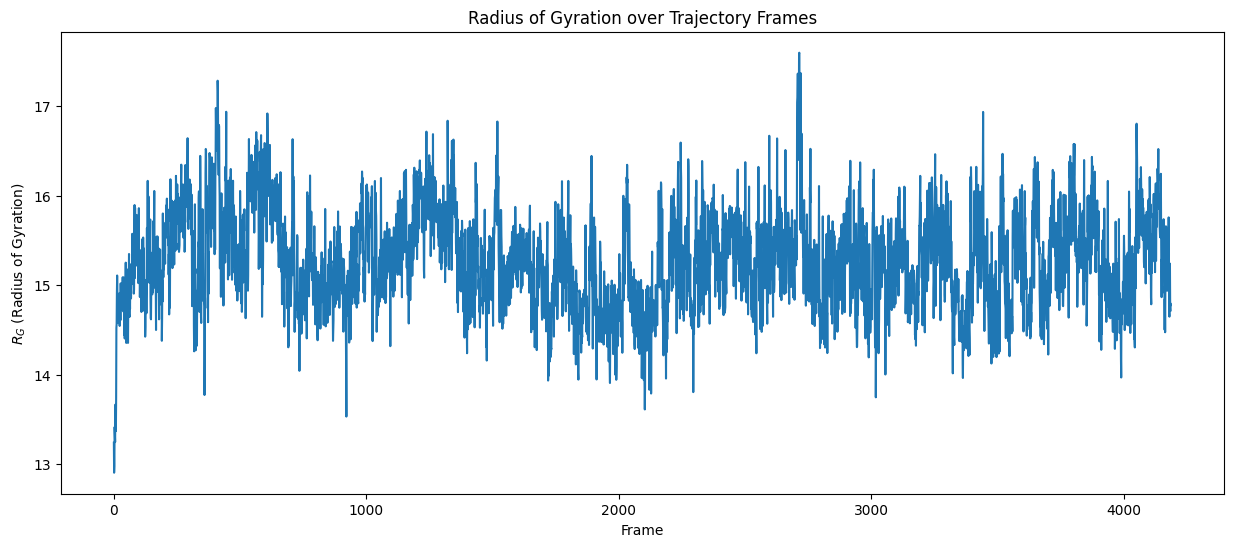

First few radius of gyration values: [13.23931680668556, 12.904143350915648, 12.978729774583288, 13.414344452398211, 13.331598721412627]


In [54]:
# Initialize an empty list to store the radius of gyration values
radius_of_gyration_values = []

# Select the alpha carbon atoms (CA) from the universe
alpha_carbons = universe.select_atoms('type CA')

# Iterate through each time step in the trajectory
for ts in universe.trajectory:
    # Calculate the radius of gyration for the alpha carbon atoms and append to the list
    radius_of_gyration_values.append(alpha_carbons.radius_of_gyration())

# Plot the radius of gyration values across the frames
plt.figure(figsize=(15, 6))
plt.plot(radius_of_gyration_values)
plt.xlabel('Frame')
plt.ylabel('$R_G$ (Radius of Gyration)')
plt.title('Radius of Gyration over Trajectory Frames')
plt.show()

# Print the first few values of the radius of gyration for verification
print("First few radius of gyration values:", radius_of_gyration_values[:5])

### Angle Plots - A plot showing the angles of the LID and NMP domains over the trajectory frames.

The calculation and ploting of the angles of the NMP and LID domains in the enzyme AdK over the trajectory frames of a molecular dynamics simulation.
Steps:
1. Initialize lists to store the angles for NMP and LID domains.
2. Iterate through each time step in the trajectory:
    a. Calculate the center of geometry for the NMP domain using specific residues.
    b. Calculate the center of geometry for the LID domain using specific residues.
    c. Calculate the angles for NMP and LID domains using the centers of geometry.
    d. Convert the angles from radians to degrees and store them in the respective lists.
3. Plot the angles over the trajectory frames.
4. Print the first few values of the angles for verification.

- theta_NMP_trajectory: List to store the angles of the NMP domain over the trajectory frames.
- theta_LID_trajectory: List to store the angles of the LID domain over the trajectory frames.
- A_NMP, B_NMP, C_NMP: Centers of geometry for the NMP domain at each time step.
- A_LID, B_LID, C_LID: Centers of geometry for the LID domain at each time step.
- theta_NMP: Angle for the NMP domain at each time step.
- theta_LID: Angle for the LID domain at each time step.

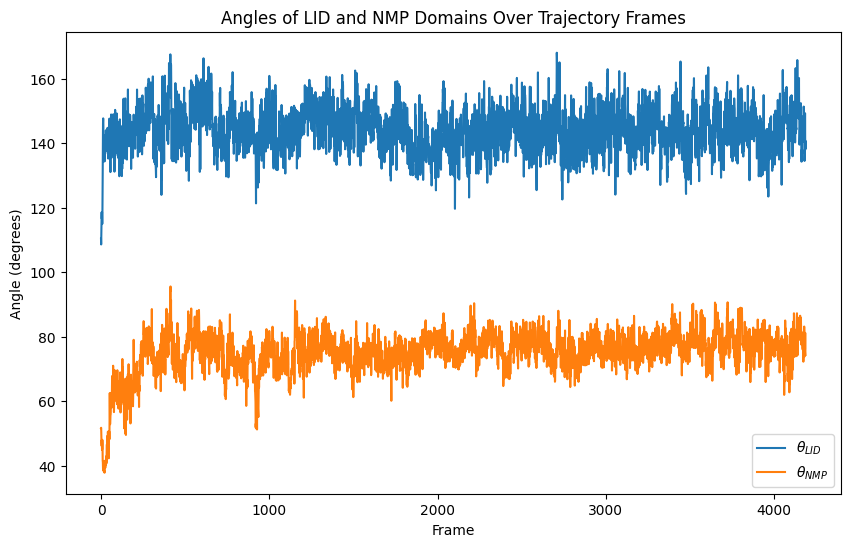

First few angles for LID domain: [110.35837416638098, 108.61490221651351, 111.41611985987542, 115.73055478605323, 118.62668020145345]
First few angles for NMP domain: [51.6584933074541, 51.77376342544903, 49.23249809978748, 47.08554458291391, 46.13729774029982]


In [ ]:
# Initialize lists to store the angles for NMP and LID domains

theta_NMP_trajectory = []
theta_LID_trajectory = []

# Iterate through each time step in the trajectory
for ts in universe.trajectory:
    # Calculate the center of geometry for the NMP domain
    A_NMP = universe.select_atoms('resid 115-125 and (backbone or name CB)').center_of_geometry()
    B_NMP = universe.select_atoms('resid 90-100 and (backbone or name CB)').center_of_geometry()
    C_NMP = universe.select_atoms('resid 35-55 and (backbone or name CB)').center_of_geometry()

    # Calculate the center of geometry for the LID domain
    A_LID = universe.select_atoms('resid 179-185 and (backbone or name CB)').center_of_geometry()
    B_LID = universe.select_atoms('resid 112-125 and (backbone or name CB)').center_of_geometry()
    C_LID = universe.select_atoms('resid 125-153 and (backbone or name CB)').center_of_geometry()

    # Calculate the angles for NMP and LID domains
    theta_NMP = mda_distances.calc_angles(A_NMP, B_NMP, C_NMP)
    theta_LID = mda_distances.calc_angles(A_LID, B_LID, C_LID)

    # Convert the angles from radians to degrees and store them in the lists
    theta_NMP_trajectory.append(np.rad2deg(theta_NMP))
    theta_LID_trajectory.append(np.rad2deg(theta_LID))

# Plot the angles over the trajectory frames
plt.figure(figsize=(10, 6))
plt.plot(theta_LID_trajectory, label=r'$\theta_{LID}$')
plt.plot(theta_NMP_trajectory, label=r'$\theta_{NMP}$')
plt.legend()
plt.xlabel('Frame')
plt.ylabel('Angle (degrees)')
plt.title('Angles of LID and NMP Domains Over Trajectory Frames')
plt.show()

# Print the first few values of the angles for verification
print("First few angles for LID domain:", theta_LID_trajectory[:5])
print("First few angles for NMP domain:", theta_NMP_trajectory[:5])

### Root-Mean-Square Deviation (RMSD) Analysis

In this section, we will perform Root-Mean-Square Deviation (RMSD) analysis to measure the structural similarity between different frames of a molecular dynamics (MD) trajectory. RMSD is a commonly used metric in structural biology to quantify the difference between atomic positions of a molecule over time.

#### Steps for RMSD Calculation:

1. **Align the Trajectory**: Align the trajectory to the reference frame (initial frame) to remove rotational and translational motions.
2. **Calculate RMSD**: Calculate the RMSD of the protein backbone atoms with respect to the initial frame.
3. **Extract RMSD Values**: Extract the RMSD values from the analysis.
4. **Create Timescale Array**: Create a timescale array based on the trajectory timestep and number of frames.
5. **Plot RMSD Values**: Plot the RMSD values over the trajectory frames and over time.

#### The selection can be based on `backbone`, `protein`, `resname`, `resid` etc. 

1. **Alignment**: The trajectory is aligned to the reference frame (initial frame) using the `align.AlignTraj` function. This step ensures that the RMSD calculation is not affected by rotational and translational motions.
2. **RMSD Calculation**: The RMSD of the protein backbone atoms is calculated with respect to the initial frame using the `rms.RMSD` function.
3. **RMSD Values Extraction**: The RMSD values are extracted from the analysis results.
4. **Timescale Array**: A timescale array is created based on the trajectory timestep and the number of frames to plot RMSD against time.
5. **Plotting**: The RMSD values are plotted against both time and frames to visualize the structural changes over the trajectory.


By following these steps, we can analyze the structural stability and conformational changes of the protein throughout the molecular dynamics simulation.


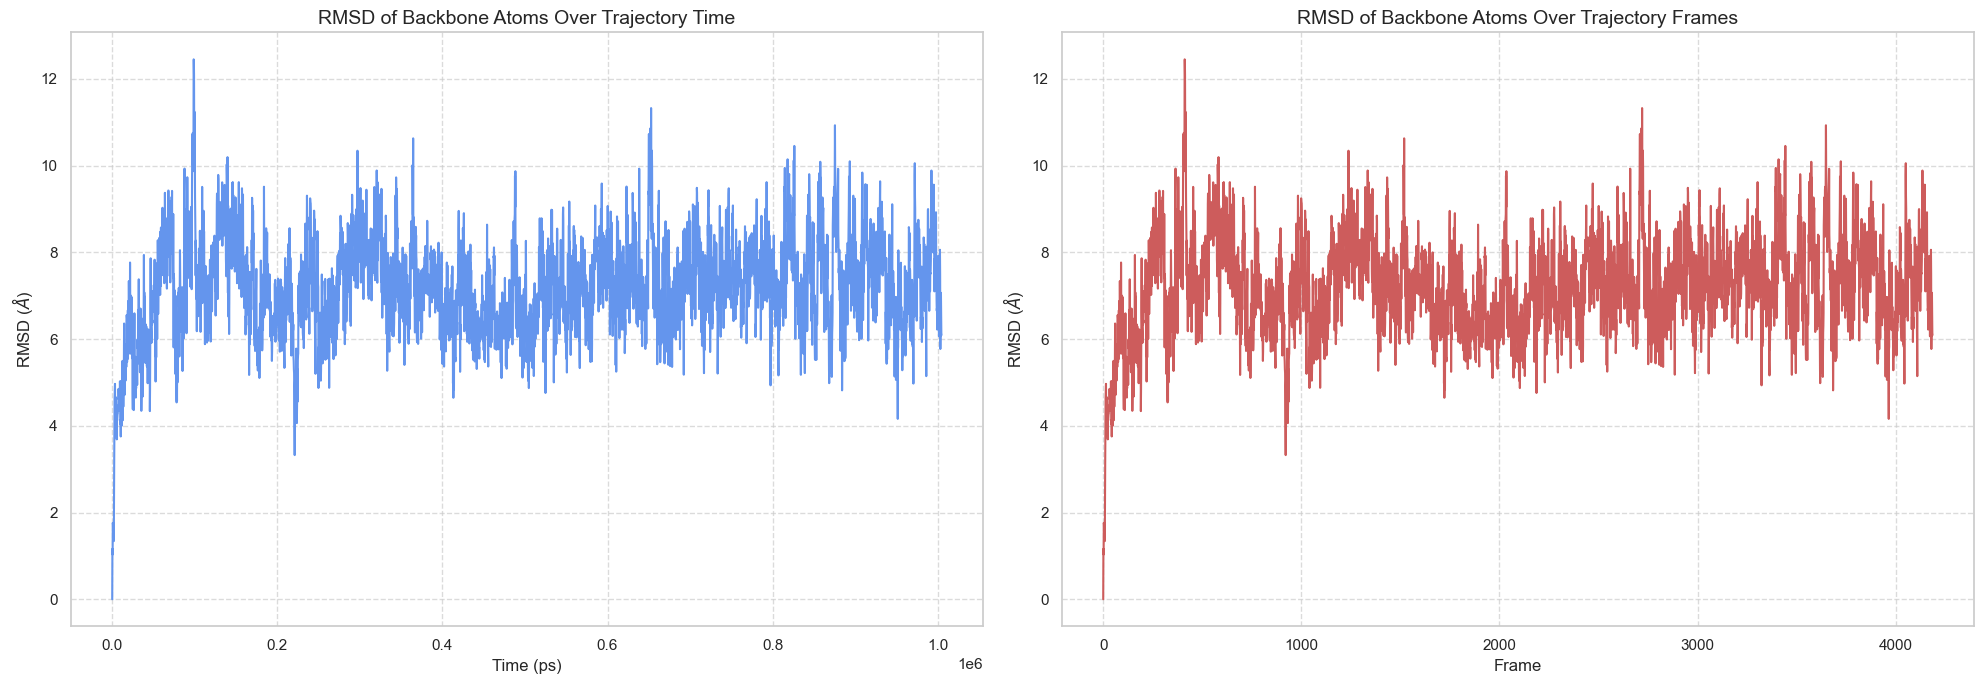

In [77]:
# Align the trajectory to the reference frame (initial frame)
alignment = align.AlignTraj(universe, universe, select='backbone', in_memory=True).run()

# Calculate the RMSD of the protein backbone atoms with respect to the initial frame
rmsd_analysis = rms.RMSD(universe, select='backbone', ref_frame=0)
rmsd_analysis.run()

# Get the RMSD values from the analysis
rmsd_values = rmsd_analysis.rmsd.T[2]

# Extract the actual time step value from the Timestep object
actual_time_step = time_step.dt

# Create a timescale array based on the trajectory timestep and number of frames
timescale = np.arange(0, num_frames * actual_time_step, actual_time_step)

# Plot the RMSD values over the trajectory frames
plt.figure(figsize=(20, 7))

# Plot RMSD vs Time
plt.subplot(1, 2, 1)
plt.plot(timescale, rmsd_values, color='cornflowerblue', linestyle='-', linewidth=1.5)
plt.xlabel('Time (ps)', fontsize=12)
plt.ylabel('RMSD ($\AA$)', fontsize=12)
plt.title('RMSD of Backbone Atoms Over Trajectory Time', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Plot RMSD vs Frames
plt.subplot(1, 2, 2)
plt.plot(rmsd_values, color='indianred', linestyle='-', linewidth=1.5)
plt.xlabel('Frame', fontsize=12)
plt.ylabel('RMSD ($\AA$)', fontsize=12)
plt.title('RMSD of Backbone Atoms Over Trajectory Frames', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


### Root Mean Square Fluctuation (RMSF)

Root Mean Square Fluctuation (RMSF) is a measure used in molecular dynamics to quantify the flexibility of a molecule, typically a protein, over the course of a simulation. It provides insights into the dynamic behavior of individual atoms or residues within the molecule.

### Key Concepts

- **Trajectory Alignment**: Before calculating RMSF, the trajectory of the molecule is often aligned to a reference frame to remove overall translational and rotational motions. This ensures that the RMSF values reflect internal fluctuations rather than global movements.
- **Selection of Atoms**: RMSF is usually calculated for a specific subset of atoms, such as the backbone atoms of a protein, to focus on the regions of interest.
- **RMSF Calculation**: The RMSF value for each atom or residue is computed as the square root of the average of the squared deviations of the atom's position from its average position over the simulation time.

### Steps in the Provided Code

1. **Align the Trajectory**: The trajectory is aligned to the reference frame using the backbone atoms.
2. **Select Backbone Atoms**: A selection of the backbone atoms is made for RMSF calculation.
3. **Calculate RMSF**: The RMSF of the selected backbone atoms is calculated.
4. **Extract RMSF Values**: The RMSF values are extracted from the analysis.
5. **Plot RMSF Values**: The RMSF values are plotted against the residue indices to visualize the flexibility of the backbone atoms over the residues.

### Visualization

The plot generated in the code shows the RMSF values along the y-axis and the residue indices along the x-axis. This visualization helps in identifying regions of the protein that exhibit higher flexibility (higher RMSF values) and regions that are more rigid (lower RMSF values).

### Example Plot

- **X-axis**: Residue Index
- **Y-axis**: RMSF (Å)
- **Title**: RMSF of Backbone Atoms Over Residues
- **Grid**: Enabled with dashed lines for better readability

This plot provides a clear representation of the dynamic behavior of the protein's backbone atoms over the course of the simulation.

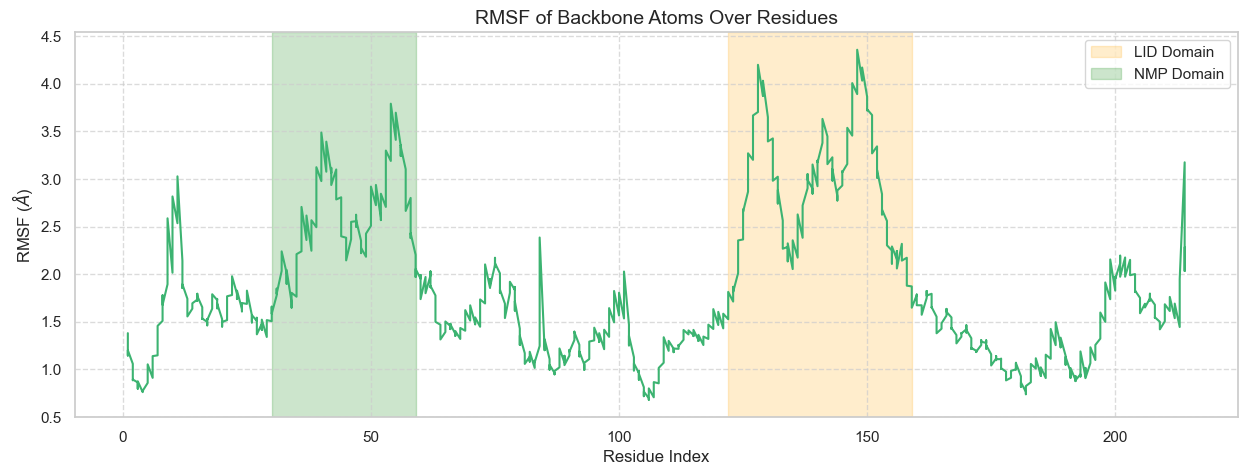

In [98]:
# Align the trajectory to the reference frame (initial frame)
alignment = align.AlignTraj(universe, universe, select='backbone', in_memory=True).run()
selection = universe.select_atoms('backbone')

# Calculate the RMSF of the protein backbone atoms
rmsf_analysis = rms.RMSF(selection).run()

# Get the RMSF values from the analysis
rmsf_values = rmsf_analysis.rmsf
resids = [atom.residue.resid for atom in selection.atoms]

# Plot the RMSF values over the residues
plt.figure(figsize=(15, 5))
plt.plot(resids, rmsf_values, color='mediumseagreen', linestyle='-', linewidth=1.5)
plt.xlabel('Residue Index', fontsize=12)
plt.ylabel('RMSF ($\AA$)', fontsize=12)
plt.axvspan(122, 159, zorder=0, alpha=0.2, color='orange', label='LID Domain')
plt.axvspan(30, 59, zorder=0, alpha=0.2, color='green', label='NMP Domain')
plt.title('RMSF of Backbone Atoms Over Residues', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()




#### Calculate and plot the Radial Distribution Function (RDF) for a given selection of atoms.
This script uses the test datasets due to its presence of solvent molecules for selection.
This script performs the following steps:
1. Defines the selection of atoms for which the RDF is to be calculated.
2. Calculates the RDF between two selections of atoms.
3. Plots the RDF.

Steps:
1. Create a Universe object from the provided TPR and XTC files.
2. Select atoms named 'CA' and atoms in the solvent (SOL) within 15 Å of the first selection.
3. Calculate the RDF between the two selections over a range of 0.0 to 15.0 Å with 75 bins.
4. Retrieve the RDF values and corresponding bins.
5. Plot the RDF with appropriate labels, title, and grid.



C:\Users\aarye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\MDAnalysis\analysis\rdf.py:347: DeprecationWarning: The `rdf` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.rdf` instead
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\aarye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\MDAnalysis\analysis\rdf.py:339: DeprecationWarning: The `bins` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.bins` instead
  warnings.warn(wmsg, DeprecationWarning)


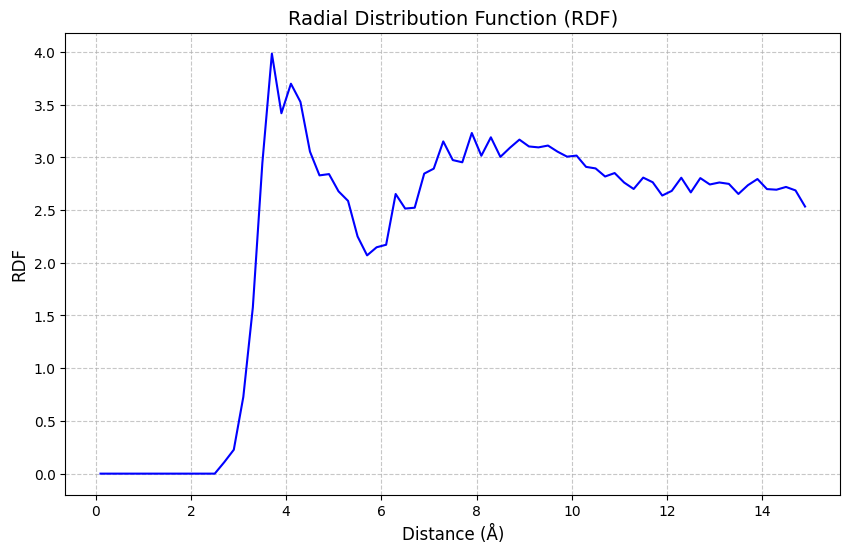

In [ ]:
# Define the selection for which you want to calculate the RDF
u = mda.Universe(TPR, XTC)

selection1 = u.select_atoms('name CA')  
selection2 = u.select_atoms('resname SOL and sphzone 15 group sel_a', sel_a=selection1)

# Calculate the RDF
rdf_analysis = rdf.InterRDF(selection1, selection2, range=(0.0, 15.0), nbins=75)
rdf_analysis.run()

# Get the RDF results
rdf_values = rdf_analysis.rdf
rdf_bins = rdf_analysis.bins

# Plot the RDF
plt.figure(figsize=(10, 6))
plt.plot(rdf_bins, rdf_values, color='blue', linestyle='-', linewidth=1.5)
plt.xlabel('Distance (Å)', fontsize=12)
plt.ylabel('RDF', fontsize=12)
plt.title('Radial Distribution Function (RDF)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Pairwise RMSD Heatmap using diffusion

In this section, we align the trajectory to itself using the alpha carbon atoms (CA) and calculate the pairwise RMSD matrix. The RMSD matrix is then visualized as a heatmap.

Steps:
1. **Align the Trajectory**: Align the trajectory to itself using the alpha carbon atoms (CA).
2. **Calculate Pairwise RMSD Matrix**: Calculate the pairwise RMSD matrix for the alpha carbon atoms.
3. **Plot RMSD Matrix**: Plot the RMSD matrix as a heatmap.


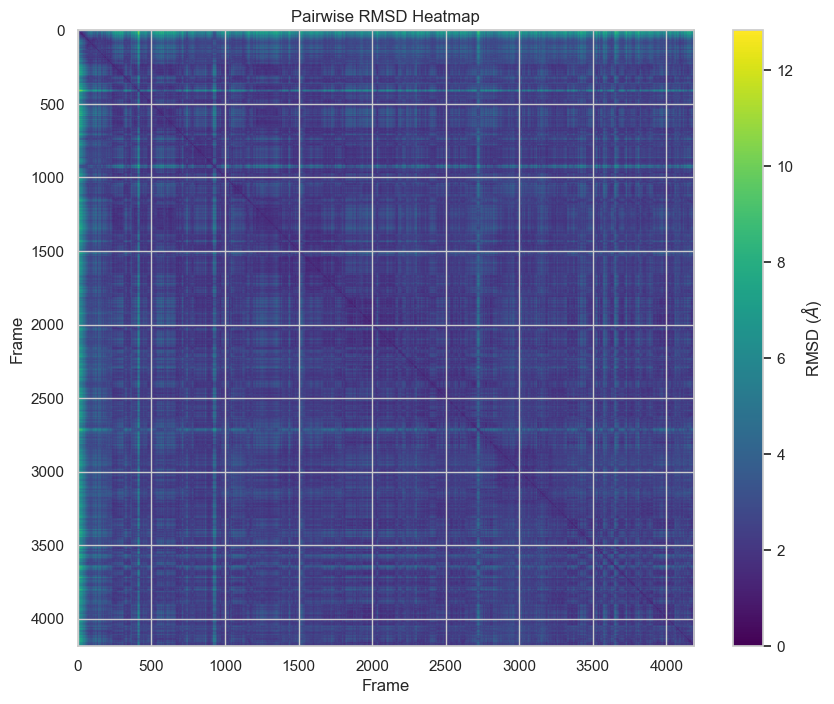

In [96]:
# Align the trajectory to itself using the alpha carbon atoms (CA)
aligner = align.AlignTraj(universe, universe, select='name CA', in_memory=True).run()

# Calculate the pairwise RMSD matrix
matrix = diffusionmap.DistanceMatrix(universe, select='name CA').run()

# Get the RMSD matrix
rmsd_matrix = matrix.results.dist_matrix

# Plot the RMSD matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(rmsd_matrix, cmap='viridis')
plt.xlabel('Frame')
plt.ylabel('Frame')
plt.colorbar(label=r'RMSD ($\AA$)')
plt.title('Pairwise RMSD Heatmap')
plt.show()

### Contact Map Calculation and Visualization

This section of the code is dedicated to calculating and visualizing the contact map of a protein structure. A contact map is a matrix that represents the distances between pairs of atoms or residues in a protein, indicating which pairs are in close proximity.

Steps Involved
1. **Selection of Atoms**:
   - The code begins by selecting the atoms of interest from the universe, specifically those that belong to the protein.

2. **Setting Parameters**:
   - A distance cutoff is defined, which determines the maximum distance (in Angstroms) for two atoms to be considered in contact.

3. **Initialization**:
   - An empty matrix is initialized to store the contact map. The size of this matrix is determined by the number of atoms in the selection.

4. **Iterating Over Frames**:
   - The code iterates over each frame in the trajectory of the universe. For each frame, it calculates the distance between all pairs of selected atoms.
   - A binary matrix is created for each frame, where entries are set to 1 if the distance between a pair of atoms is less than the cutoff, and 0 otherwise.
   - This binary matrix is then added to the contact map matrix.

5. **Normalization**:
   - After iterating through all frames, the contact map is normalized by dividing by the total number of frames. This gives the average contact map over the trajectory.

6. **Visualization**:
   - The contact map is visualized using a heatmap. The heatmap uses a color gradient to represent the values in the contact map, with a title and labels for the axes indicating residue indices.

This process provides a visual representation of which parts of the protein are in close proximity throughout the simulation, which can be useful for understanding the protein's structure and dynamics.

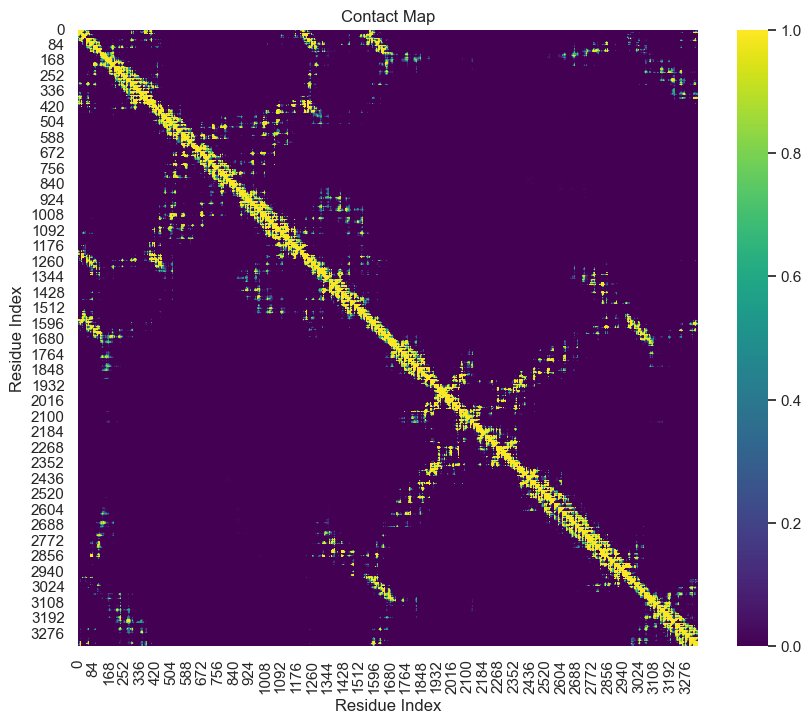

In [99]:
# Define the selection for which you want to calculate the contact map
selection = universe.select_atoms('protein')

# Set parameters for the contact analysis
cutoff = 8.0  # distance cutoff in Angstroms

# Initialize an empty matrix for the contact map
n_atoms = len(selection)
contact_map = np.zeros((n_atoms, n_atoms))

# Iterate over frames to calculate contact map
for ts in universe.trajectory:
    distances = contacts.distance_array(selection.positions, selection.positions)
    contacts_frame = (distances < cutoff).astype(int)
    contact_map += contacts_frame

# Normalize contact map by the number of frames
contact_map /= len(universe.trajectory)

# Plot the contact map
plt.figure(figsize=(10, 8))
sns.heatmap(contact_map, cmap='viridis')
plt.title('Contact Map')
plt.xlabel('Residue Index')
plt.ylabel('Residue Index')
plt.show()


#### Perform helix analysis on the alpha carbon atoms (CA) in residues 161-187
As an example the code performs a helix analysis on the alpha carbon atoms (CA) in residues 161-187 using the `HELANAL` method from the `hel` module. The analysis is run on a specified `universe` object, and the selection criteria are defined to include only the alpha carbon atoms within the specified residue range. The reference axis for the analysis is set to `[0, 0, 1]`.

Global Tilts:
mean: 162.851
sample_sd: 2.686
abs_dev: 1.979


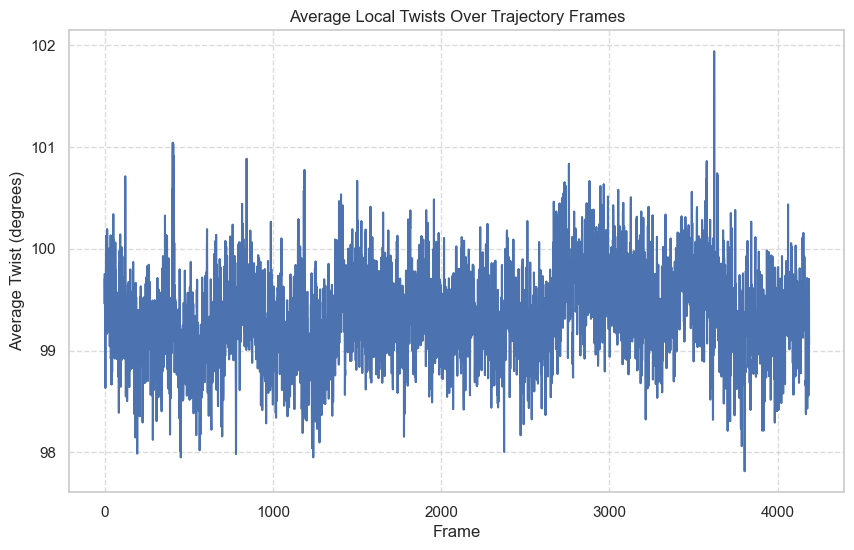

In [102]:
# Perform helix analysis on the alpha carbon atoms (CA) in residues 161-187
helix_analysis = hel.HELANAL(universe, select='name CA and resnum 161-187', ref_axis=[0, 0, 1]).run()

# Print the global tilts from the helix analysis results
print("Global Tilts:")
for tilt_type, tilt_value in helix_analysis.results.summary['global_tilts'].items():
    print(f"{tilt_type}: {tilt_value:.3f}")

# Plot the average local twists over the trajectory frames
plt.figure(figsize=(10, 6))
plt.plot(helix_analysis.results.local_twists.mean(axis=1))
plt.xlabel('Frame')
plt.ylabel('Average Twist (degrees)')
plt.title('Average Local Twists Over Trajectory Frames')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

#### Hydrogen Bond Analysis in Protein Trajectory

This code performs an analysis of hydrogen bonds within a protein over a trajectory time. Here's a step-by-step breakdown of what the code does:

1. **Define Selections for Donors, Acceptors, and Hydrogens**:
   - `donors_sel`, `acceptors_sel`, and `hydrogens_sel` are defined to select all protein atoms, with hydrogens specifically selected by name.

2. **Initialize Hydrogen Bond Analysis**:
   - An instance of `HBA` (Hydrogen Bond Analysis) is created with the specified universe and selection criteria.
   - Cutoffs for donor-acceptor distance (`d_a_cutoff`) and donor-hydrogen-acceptor angle (`d_h_a_angle_cutoff`) are set.

3. **Run the Hydrogen Bond Analysis**:
   - The `run` method is called to perform the analysis.

4. **Print Summary of Detected Hydrogen Bonds**:
   - The first few detected hydrogen bonds are printed, showing donor, hydrogen, and acceptor atoms along with their distances and angles.

5. **Plot the Number of Hydrogen Bonds Over Time**:
   - A plot is created to visualize the number of hydrogen bonds over the trajectory time.
   - Time is converted to nanoseconds, and the number of hydrogen bonds at each time step is plotted.
   - An average line is added to the plot to represent the average number of hydrogen bonds.

6. **Display the Plot**:
   - The plot is displayed with labels, a title, a grid, and a legend.

This analysis helps in understanding the dynamics of hydrogen bonding within the protein over the course of the simulation.


First few hydrogen bonds detected:
Donor atom - Hydrogen atom - Acceptor atom - Distance (Å) - Angle (degrees)
0.0          - 1.0            - 1.0            - 17.00 - 2.75
0.0          - 1.0            - 1.0            - 18.00 - 2.99
0.0          - 1.0            - 1.0            - 8.00 - 2.38
0.0          - 1.0            - 1.0            - 6.00 - 2.64
0.0          - 2.0            - 2.0            - 17.00 - 2.80


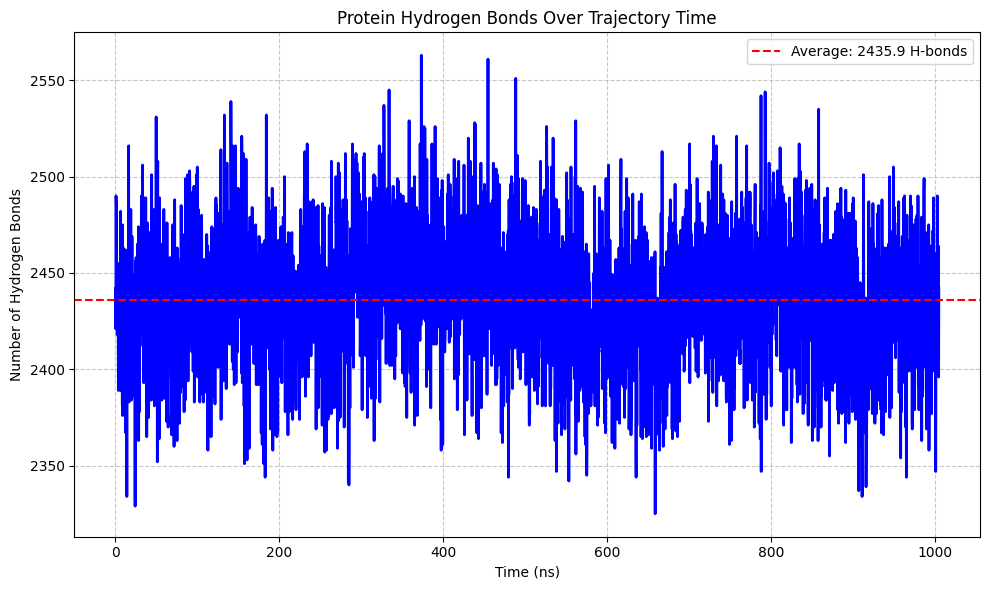

In [ ]:
# Define the selections for donors, acceptors, and hydrogens
donors_sel = 'protein'
acceptors_sel = 'protein'
hydrogens_sel = 'protein and name H*'

# Initialize hydrogen bond analysis with specified cutoffs
hbond_analysis = HBA(
    universe=universe,
    donors_sel=donors_sel,
    hydrogens_sel=hydrogens_sel,
    acceptors_sel=acceptors_sel,
    d_a_cutoff=3.0,  # donor-acceptor distance cutoff in Ångströms
    d_h_a_angle_cutoff=150.0,  # donor-hydrogen-acceptor angle cutoff in degrees
)

# Run the hydrogen bond analysis
hbond_analysis.run()

# Print a summary of the first few detected hydrogen bonds
print("\nFirst few hydrogen bonds detected:")
print("Donor atom - Hydrogen atom - Acceptor atom - Distance (Å) - Angle (degrees)")
for hbond in hbond_analysis.results.hbonds[:5]:
    print(f"{hbond[0]:<12} - {hbond[1]:<14} - {hbond[2]:<14} - {hbond[3]:.2f} - {hbond[4]:.2f}")

# Create a plot of the number of hydrogen bonds over time
plt.figure(figsize=(10, 6))
times = np.array(hbond_analysis.times) / 1000  # Convert time to nanoseconds
counts = hbond_analysis.count_by_time()  # Get the number of hydrogen bonds at each time step

# Plot the number of hydrogen bonds over time
plt.plot(times, counts, 'b-', linewidth=2)
plt.xlabel('Time (ns)')
plt.ylabel('Number of Hydrogen Bonds')
plt.title('Protein Hydrogen Bonds Over Trajectory Time')
plt.grid(True, linestyle='--', alpha=0.7)

# Add a horizontal line representing the average number of hydrogen bonds
avg_hbonds = np.mean(counts)
plt.axhline(y=avg_hbonds, color='r', linestyle='--', label=f'Average: {avg_hbonds:.1f} H-bonds')

# Display the legend and show the plot
plt.legend()
plt.tight_layout()
plt.show()

### Dimension Reduction:
#### Principal Component Analysis

A molecular dynamics trajectory with \(N\) atoms can be considered a path through a 3\(N\)-dimensional molecular configuration space. Extracting important dynamics or comparing trajectory similarity from such a high-dimensional space can be challenging. However, collective motions and physically relevant states can often be effectively described with low-dimensional representations of the conformational space explored over the trajectory. MDAnalysis implements two methods for dimensionality reduction.

Principal component analysis (PCA) is a common linear dimensionality reduction technique that maps the coordinates in each frame of your trajectory to a linear combination of orthogonal vectors. These vectors are called principal components, and they are ordered such that the first principal component accounts for the most variance in the original data (i.e., the largest uncorrelated motion in your trajectory), and each successive component accounts for less and less variance. The frame-by-frame conformational fluctuation can be considered a linear combination of the essential dynamics yielded by the PCA.

Trajectory coordinates can be transformed onto a lower-dimensional space (essential subspace) constructed from these principal components to compare conformations. This allows you to visualize the motion described by that component.

Steps for PCA:

1. **Alignment**: Optionally align each frame in your trajectory to the first frame.
2. **Covariance Matrix Construction**: Construct a 3\(N\) x 3\(N\) covariance matrix for the \(N\) atoms in your trajectory. Optionally, you can provide a mean; otherwise, the covariance is calculated relative to the averaged structure over the trajectory.
3. **Diagonalization**: Diagonalize the covariance matrix. The eigenvectors are the principal components, and their eigenvalues are the associated variance.
4. **Sorting**: Sort the eigenvalues so that the principal components are ordered by variance.


C:\Users\aarye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\MDAnalysis\analysis\pca.py:329: DeprecationWarning: The `variance` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.variance` instead.
  warnings.warn(wmsg, DeprecationWarning)
C:\Users\aarye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\MDAnalysis\analysis\pca.py:337: DeprecationWarning: The `cumulated_variance` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.cumulated_variance` instead.
  warnings.warn(wmsg, DeprecationWarning)


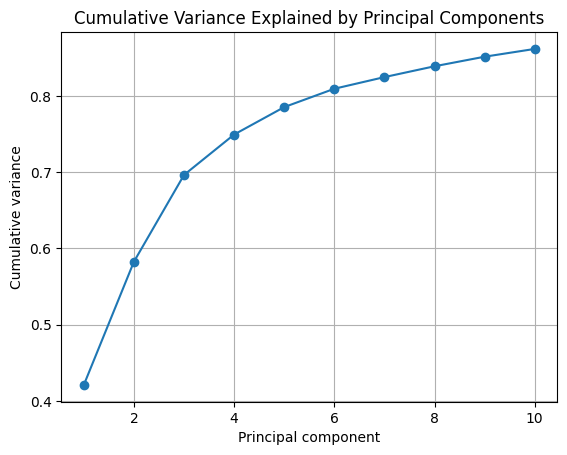

In [73]:
# Select the backbone atoms and perform PCA on this subset
aligner = align.AlignTraj(universe, universe, select='backbone', in_memory=True).run()

pca_analysis = pca.PCA(universe, select='backbone',
             align=True, mean=None,
             n_components=None).run()

backbone = universe.select_atoms('backbone')

# Get the PCA results
pca_components = pca_analysis.p_components
explained_variance = pca_analysis.variance
# Calculate the explained variance ratio
explained_variance_ratio = explained_variance / explained_variance.sum()

# Project the trajectory onto the first two principal components for the backbone atom group
pca_projection = pca_analysis.transform(backbone, n_components=2)

plt.figure()
plt.plot(range(1, 11), pca_analysis.cumulated_variance[:10], marker='o')
plt.xlabel('Principal component')
plt.ylabel('Cumulative variance')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.show()


<Figure size 640x480 with 0 Axes>

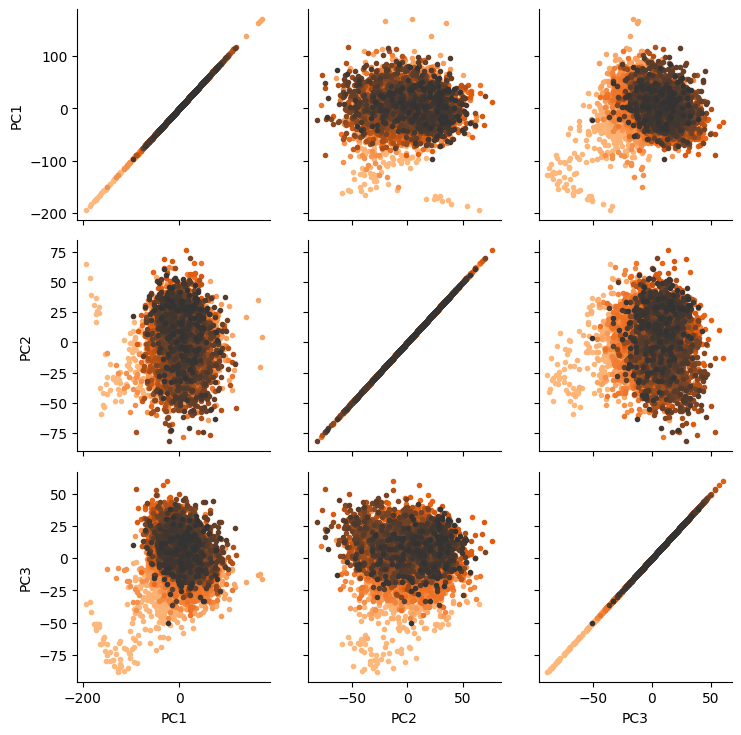

In [75]:
# Transform the trajectory data into the first three principal components
transformed_coords = pca_analysis.transform(backbone, n_components=3)

# Check the shape of the transformed coordinates
transformed_coords.shape

# Create a DataFrame to store the transformed coordinates and corresponding time
df_pca = pd.DataFrame(transformed_coords, columns=['PC1', 'PC2', 'PC3'])
df_pca['Time (ps)'] = df_pca.index * universe.trajectory.dt

# Display the first few rows of the DataFrame
df_pca.head()

# Plot the pairwise relationships in the transformed data
plt.figure()
pair_grid = sns.PairGrid(df_pca, hue='Time (ps)', palette=sns.color_palette('Oranges_d', n_colors=len(df_pca)))
pair_grid.map(plt.scatter, marker='.')
plt.show()

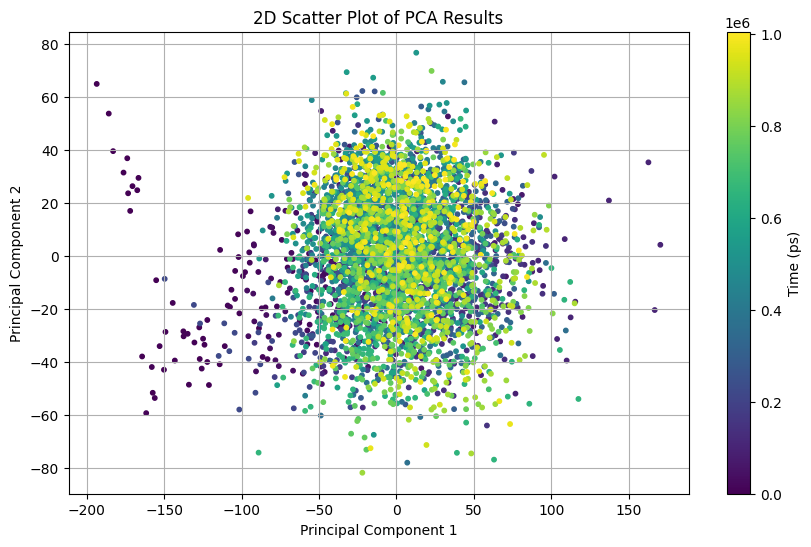

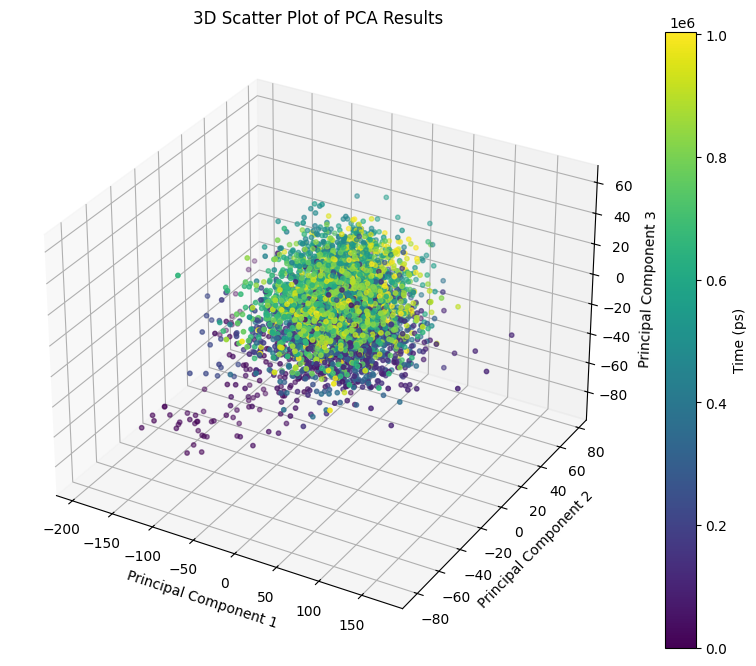

In [78]:
# 2D Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['Time (ps)'], cmap='viridis', s=10)
plt.colorbar(label='Time (ps)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Scatter Plot of PCA Results')
plt.grid(True)
plt.show()

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df_pca['PC1'], df_pca['PC2'], df_pca['PC3'], c=df_pca['Time (ps)'], cmap='viridis', s=10)
plt.colorbar(sc, label='Time (ps)')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of PCA Results')
plt.show()

In [76]:
# Extract the first principal component and the transformed coordinates along the first principal component
first_pc = pca_analysis.p_components[:, 0]
transformed_first_pc = transformed_coords[:, 0]

# Project the transformed coordinates back to the original space
projected_coordinates = np.outer(transformed_first_pc, first_pc) + pca_analysis.mean.flatten()

# Reshape the projected coordinates to match the original dimensions
reshaped_coordinates = projected_coordinates.reshape(len(transformed_first_pc), -1, 3)

# Create a new MDAnalysis Universe with the projected coordinates
projected_universe = mda.Merge(backbone)
projected_universe.load_new(reshaped_coordinates, order="fac")

# Visualize the projected trajectory using NGLView
view = nv.show_mdanalysis(projected_universe.atoms)
view

C:\Users\aarye\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\MDAnalysis\analysis\pca.py:321: DeprecationWarning: The `p_components` attribute was deprecated in MDAnalysis 2.0.0 and will be removed in MDAnalysis 3.0.0. Please use `results.p_components` instead.
  warnings.warn(wmsg, DeprecationWarning)


NGLWidget(max_frame=4186)